# First intent with notebook

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target




In [5]:
#print( X_iris[0].__name__)
print( X_iris.shape, y_iris.shape)
print (X_iris[0], y_iris[0])
print(iris.target_names)


AttributeError: 'numpy.ndarray' object has no attribute '__name__'

# Build train and test

In [29]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)

(112, 2) (112,)


# Standardize the features

In [30]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Plot the data

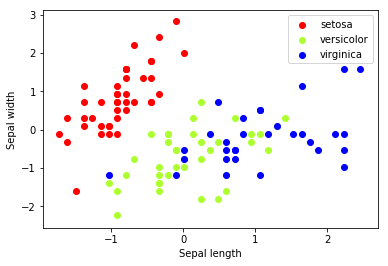

In [31]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
    
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


# Clasifier

In [32]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-33.77967656  19.13871055]
 [ -3.84646435 -14.17233629]
 [ 13.29625567  -7.38899584]]
[-18.46909467  -8.8654554  -11.00132204]


# Plot boundaries

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


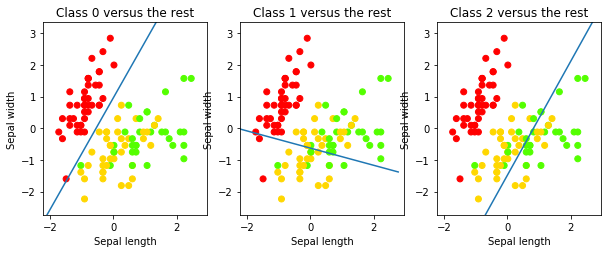

In [33]:
import numpy as np

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    fig.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)
    
plt.show()

# Classification

In [35]:
pre=clf.predict(scaler.transform([[4.7, 3.1]]))
print(pre)

[0]


# Accuracy

In [37]:
from sklearn import metrics

y_pred = clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.657894736842


# F1

In [38]:
quality=metrics.classification_report(y_test, y_pred,target_names=iris.target_names)
print(quality)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.38      0.27      0.32        11
  virginica       0.64      0.74      0.68        19

avg / total       0.64      0.66      0.64        38



# Confusion matrix

In [39]:
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 8  0  0]
 [ 0  3  8]
 [ 0  5 14]]


# Cross validation

In [41]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('linear_model', SGDClassifier())
])

# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[ 0.73333333  0.8         0.7         0.86666667  0.66666667]
